<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [20]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [21]:
# Write your code here
# Display column data types
print("Column Data Types:")
print(df.dtypes)

# Display counts of non-missing values
print("\nCounts of Non-Missing Values:")
print(df.count())

# Display missing values
print("\nMissing Values:")
print(df.isnull().sum())

Column Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Counts of Non-Missing Values:
ResponseId             65437
MainBranch             65437
Age                    65437
Employment             65437
RemoteWork             54806
                       ...  
JobSatPoints_11        29445
SurveyLength           56182
SurveyEase             56238
ConvertedCompYearly    23435
JobSat                 29126
Length: 114, dtype: int64

Missing Values:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength     

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [22]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [23]:
# Write your code here
# Identify unique values in the Country column
unique_countries = df['Country'].unique()

# Display the unique values
print(unique_countries)



['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [25]:
df['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [24]:
# Identify inconsistent entries (e.g., "Nomadic") and missing values (NaN) in the Country column
inconsistent_entries = ['Nomadic', None]

# Remove inconsistent entries and missing values from the Country column
df_cleaned = df[~df['Country'].isin(inconsistent_entries)].dropna(subset=['Country'])

# Verify the cleaning
unique_countries_cleaned = df_cleaned['Country'].unique()
print(unique_countries_cleaned)

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [26]:
## Write your code here

# Create mapping dictionaries for standardizing entries
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Bolivarian Republic of Venezuela': 'Venezuela',
    'Micronesia, Federated States of...':'Micronesia',
    'Congo, Republic of the...':'Democratic Republic of the Congo',
    "Democratic People's Republic of Korea":'South Korea',
    'Venezuela, Bolivarian Republic of...':'Venezuela'
}

edlevel_mapping = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Some college/university study without earning a degree': 'Some college',
    'Associate degree (A.A., A.S., etc.)':'Associate degree',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary School',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional degree'
}

# Standardize the Country column
df['Country'] = df['Country'].replace(country_mapping)

# Standardize the EdLevel column
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

# Verify the standardization
print(df['Country'].unique())
print(df['EdLevel'].unique())

['USA' 'UK' 'Canada' 'Norway' 'Uzbekistan' 'Serbia' 'Poland' 'Philippines'
 'Bulgaria' 'Switzerland' 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine'
 'Australia' 'Brazil' 'Japan' 'Austria' 'Iran' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 'Venezuela' 'Costa Rica' 'Jamaica' 'Thailand' 'Nicaragua' 'Myanmar'
 'Republic of Korea' 'Rwanda'

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [27]:
## Write your code here
# Perform one-hot encoding on the Employment column
df_encoded = pd.get_dummies(df, columns=['Employment'])

# Display the first few rows to verify the encoding
df_encoded.head()

,ResponseId,MainBranch,Age,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,"Employment_Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Employment_Student, full-time;Not employed, but looking for work;Retired","Employment_Student, full-time;Not employed, but looking for work;Student, part-time","Employment_Student, full-time;Retired","Employment_Student, full-time;Student, part-time","Employment_Student, full-time;Student, part-time;Employed, part-time","Employment_Student, full-time;Student, part-time;Retired","Employment_Student, part-time","Employment_Student, part-time;Employed, part-time","Employment_Student, part-time;Retired"
0,1,I am a developer by profession,Under 18 years old,Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,I am a developer by profession,35-44 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor’s degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,False,False
2,3,I am a developer by profession,45-54 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master’s degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,False,False
3,4,I am learning to code,18-24 years old,NaN,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,False,False,False,False,False,False,False,False,False,False
4,5,I am a developer by profession,18-24 years old,NaN,Apples,NaN,Secondary School,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,False,False,False,False,False,False,False,False,False,False


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [32]:
## Write your code here
# Identify columns with the highest number of missing values
missing_values_summary = df.isnull().sum()

# Sort the columns by the number of missing values in descending order
missing_values_sorted = missing_values_summary.sort_values(ascending=False)

# Display the top columns with the highest number of missing values
print(missing_values_sorted.head(10))  # Adjust the number to see more or fewer columns

AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [33]:
## Write your code here
# Calculate the median value of the ConvertedCompYearly column
median_converted_comp_yearly = df['ConvertedCompYearly'].median()
# Replace missing values in ConvertedCompYearly with the median value using the updated method
df = df.fillna({'ConvertedCompYearly': median_converted_comp_yearly})

# Verify the imputation
print(df['ConvertedCompYearly'].isnull().sum())

0


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [34]:
## Write your code here
# Check for missing values in categorical columns
categorical_columns = ['RemoteWork']  # Add other categorical columns if needed

# Display missing values in categorical columns
print(df[categorical_columns].isnull().sum())

RemoteWork    10631
dtype: int64


In [36]:
# Impute missing values with the most frequent value (mode)
for column in categorical_columns:
    mode_value = df[column].mode()[0]  # Calculate the mode
    df[column] = df[column].fillna(mode_value)  # Replace missing values with the mode

# Check for missing values after imputation
print(df[categorical_columns].isnull().sum())

RemoteWork    0
dtype: int64


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [37]:
## Write your code here
# Apply Min-Max Scaling to the 'ConvertedCompYearly' column
min_value = df['ConvertedCompYearly'].min()
max_value = df['ConvertedCompYearly'].max()

df['ConvertedCompYearly_scaled'] = (df['ConvertedCompYearly'] - min_value) / (max_value - min_value)

# Display the first few rows of the scaled column
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_scaled']].head())

   ConvertedCompYearly  ConvertedCompYearly_scaled
0              65000.0                    0.003998
1              65000.0                    0.003998
2              65000.0                    0.003998
3              65000.0                    0.003998
4              65000.0                    0.003998


In [38]:
# Check the range of the scaled column
print("Minimum value of scaled column:", df['ConvertedCompYearly_scaled'].min())
print("Maximum value of scaled column:", df['ConvertedCompYearly_scaled'].max())

Minimum value of scaled column: 0.0
Maximum value of scaled column: 1.0


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [39]:
## Write your code here
import numpy as np

# Add a small constant (e.g., 1) to handle zeros or negative values
df['ConvertedCompYearly_log'] = np.log(df['ConvertedCompYearly'] + 1)

# Display the first few rows of the log-transformed column
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_log']].head())

   ConvertedCompYearly  ConvertedCompYearly_log
0              65000.0                11.082158
1              65000.0                11.082158
2              65000.0                11.082158
3              65000.0                11.082158
4              65000.0                11.082158


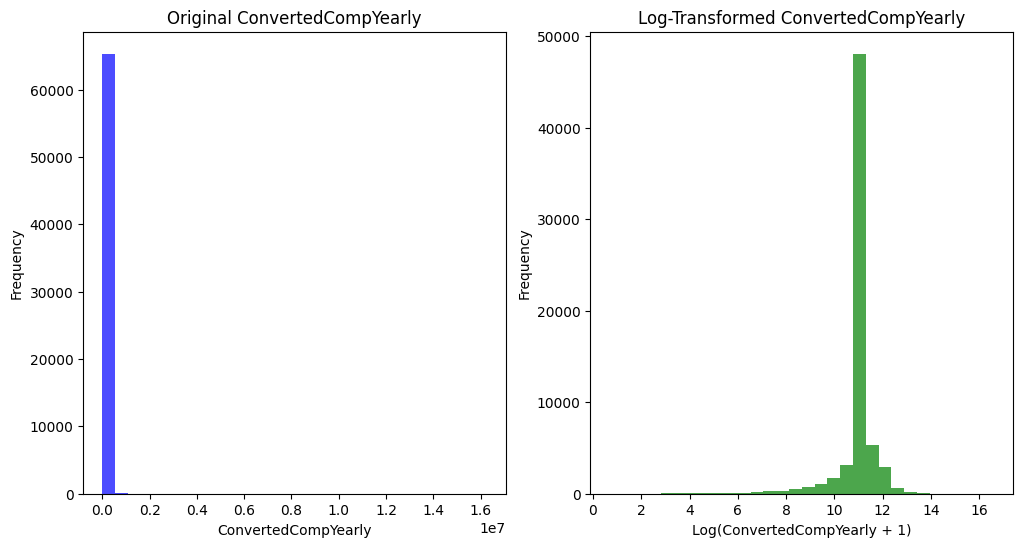

In [40]:
import matplotlib.pyplot as plt

# Plot the distribution of the original column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['ConvertedCompYearly'], bins=30, color='blue', alpha=0.7)
plt.title('Original ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Plot the distribution of the log-transformed column
plt.subplot(1, 2, 2)
plt.hist(df['ConvertedCompYearly_log'], bins=30, color='green', alpha=0.7)
plt.title('Log-Transformed ConvertedCompYearly')
plt.xlabel('Log(ConvertedCompYearly + 1)')
plt.ylabel('Frequency')

plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [49]:
## Write your code here
# Display unique values in the 'YearsCodePro' column
print(df['YearsCodePro'].unique())

[ 0 17 27  7 11 25 12 10  3 18 37 15 20  6  2 16  8 14  4 45  1 24 29  5
 30 26  9 33 13 35 23 22 31 19 21 28 34 32 40 50 39 44 42 41 36 38 43 47
 48 46 49]


In [46]:
# Convert the column to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [47]:
# Replace non-numeric values with appropriate numeric values
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 50
})

# Fill missing values with 0
df['YearsCodePro'] = df['YearsCodePro'].fillna(0)

In [50]:
# Define the bins and labels for experience levels
bins = [0, 2, 5, 10, float('inf')]  # float('inf') represents "11+ years"
labels = ['Entry', 'Mid', 'Senior', 'Expert']

# Create the 'ExperienceLevel' column
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Display the first few rows of the updated DataFrame
print(df[['YearsCodePro', 'ExperienceLevel']].head())

   YearsCodePro ExperienceLevel
0             0           Entry
1            17          Expert
2            27          Expert
3             0           Entry
4             0           Entry


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
